In [1]:
%matplotlib inline

In [8]:
import pandas as pd
import polars as pl
import time 
import numpy as np
from backtesting.backtester import Backtester, BaseStrategy
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [6]:
# 全局设置中文显示
plt.rcParams["font.family"] = ["SimHei","Microsoft YaHei"] # 设置中文字体
plt.rcParams["axes.unicode_minus"] = False  # 正确显示负号

In [9]:
class TestStrategy(BaseStrategy):
    def generate_signals_for_all_dates(self):
        dates = ['2023-01-01', '2023-01-02', '2023-01-03']
        symbols = ['AAPL', 'GOOGL']
        data = []
        for date in dates:
            for symbol in symbols:
                data.append({
                'date': date,
                'symbol': symbol,
                'target_weight': 0.5
        })
        return pd.DataFrame(data)
# 创建市场数据
dates = ['2023-01-01', '2023-01-02', '2023-01-03']
symbols = ['AAPL', 'GOOGL']
data = []
for date in dates:
    for symbol in symbols:
        data.append({
        'date': date,
        'symbol': symbol,
        'close': 100.0
        })
market_data = pd.DataFrame(data)
# 运行回测
strategy = TestStrategy(None)
config = {
 'initial_capital': 100000,
 'transaction_cost': 0.001,
 'symbol_col': 'symbol',
 'date_col': 'date',
 'close_col': 'close'
}
backtester = Backtester(strategy, market_data, config)
backtester.run_backtest()
if backtester.portfolio_history is not None:
    print('回测成功完成!')
    print(backtester.portfolio_history.head())
else:
    print('回测失败')

Rust 回测成功完成。
回测成功完成!
         date    equity      cash  holdings_value
0  2023-01-01  100000.0 -100.0000            -0.0
1  2023-01-02   99900.0   -0.1000        100000.0
2  2023-01-03   99899.9   -0.0001         99900.0


<center>添加回测结果绘图逻辑</center>

         date    equity      cash  holdings_value
0  2023-01-01  100000.0 -100.0000            -0.0
1  2023-01-02   99900.0   -0.1000        100000.0
2  2023-01-03   99899.9   -0.0001         99900.0


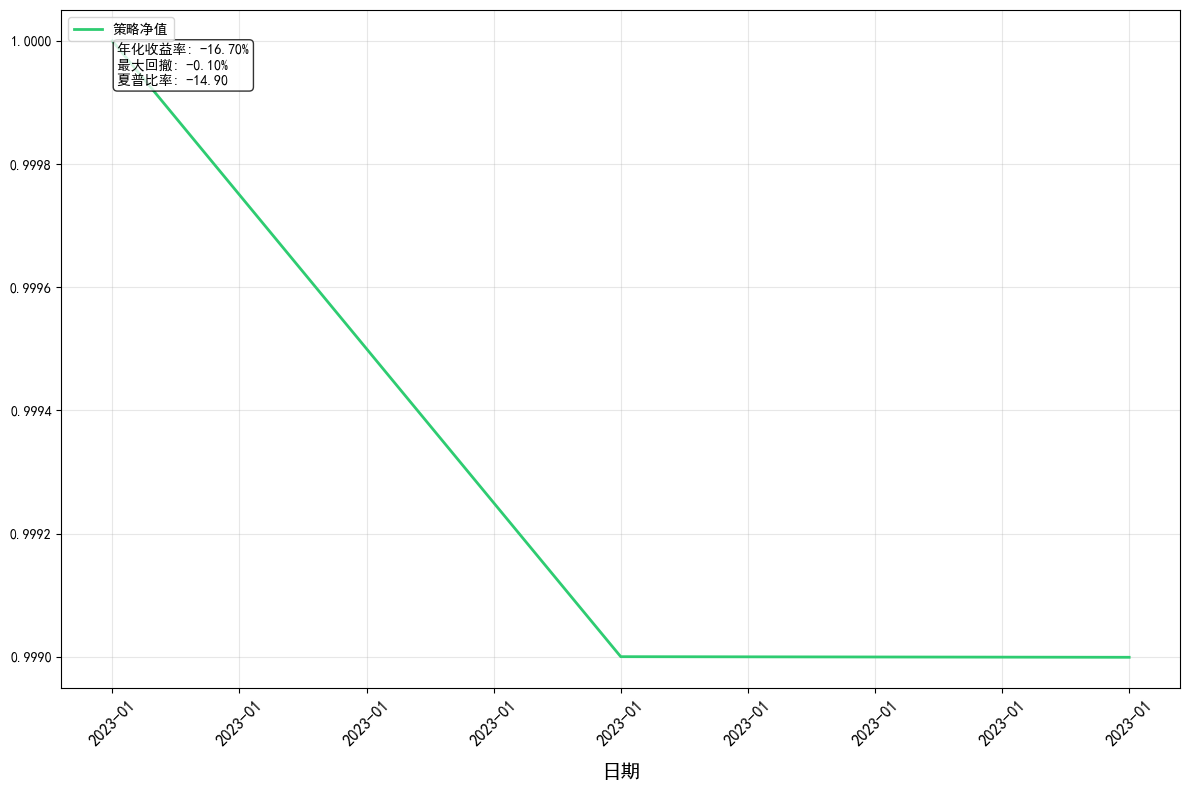

In [12]:
backtester.plot_equity_curve()